In [1]:
import pybamm
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
os.chdir(pybamm.__path__[0]+'/..')

In [2]:
model = pybamm.lithium_ion.DFN(options={"open circuit potential": "current sigmoid"})
param = pybamm.ParameterValues("OKane2023")

exp1 = pybamm.Experiment(["Discharge at C/10 until 2.5 V", "Charge at C/10 for 3 hours"])
exp3 = pybamm.Experiment(["Discharge at C/10 for 90 minutes", "Charge at C/10 until 4.2 V", "Hold at 4.2 V until C/100"])
exp5 = pybamm.Experiment(["Discharge at C/10 until 2.5 V", "Charge at C/10 until 4.2 V", "Hold at 4.2 V until C/100"])

var_pts = {
    "x_n": 5,  # negative electrode
    "x_s": 5,  # separator 
    "x_p": 5,  # positive electrode
    "r_n": 50,  # negative particle
    "r_p": 20,  # positive particle
}

sim1 = pybamm.Simulation(model, parameter_values=param, experiment=exp1, var_pts=var_pts)
sol1 = sim1.solve(calc_esoh=False)
sim3 = pybamm.Simulation(model, parameter_values=param, experiment=exp3, var_pts=var_pts)
sol3 = sim3.solve(calc_esoh=False)
sim5 = pybamm.Simulation(model, parameter_values=param, experiment=exp5, var_pts=var_pts)
sol5 = sim5.solve(calc_esoh=False)

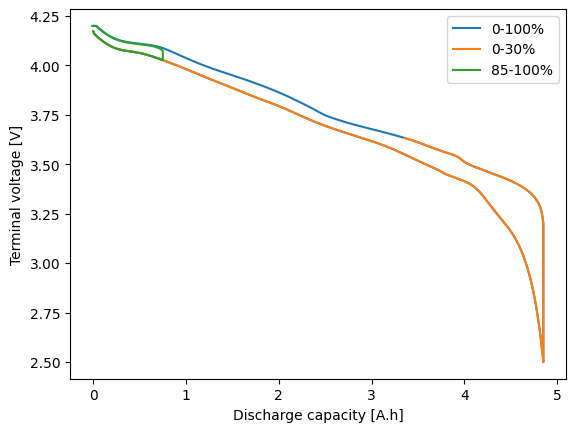

In [3]:
Q1 = sol1["Discharge capacity [A.h]"].entries
V1 = sol1["Terminal voltage [V]"].entries
Q3 = sol3["Discharge capacity [A.h]"].entries
V3 = sol3["Terminal voltage [V]"].entries
Q5 = sol5["Discharge capacity [A.h]"].entries
V5 = sol5["Terminal voltage [V]"].entries
plt.figure()
plt.plot(Q5,V5,label="0-100%")
plt.plot(Q1,V1,label="0-30%")
plt.plot(Q3,V3,label="85-100%")
plt.xlabel("Discharge capacity [A.h]")
plt.ylabel("Terminal voltage [V]")
plt.legend()
plt.show()